# Linear Regression (using normal equation and sk-learn)
Data source: https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

## Preliminary EDA

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Set general workspace features

In [2]:
plt.rcParams['figure.figsize'] = [15, 12]
plt.rcParams['font.size'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-dark')

### Import data

In [3]:
health_coverage = pd.read_csv('C:/Users/tohaj/Box/Programming/Data Science/DATA SETS/insurance.csv')

### Check data shape/dimension

In [4]:
print('The health insurance data has', health_coverage.shape[0], 'rows and', health_coverage.shape[1], 'columns.')

The health insurance data has 1338 rows and 7 columns.


### Summarize the data

In [5]:
health_coverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
health_coverage.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Check for missing values, negative values

In [7]:
health_coverage.isnull()
np.any(health_coverage) < 0

False

In [8]:
health_coverage.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


Text(0.5, 1.0, 'Heatmap showing the distribution of missing values in the data')

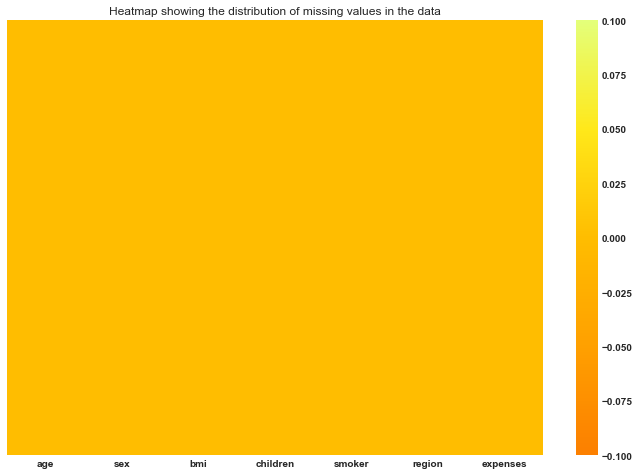

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(health_coverage.isnull(), cmap = 'Wistia_r', yticklabels = False)
plt.title('Heatmap showing the distribution of missing values in the data')

There are no missing values in the data

In [10]:
np.any(health_coverage) < 0

False

There are no negative values in the data

### Check pairwise correlation across variables

NB: Correlation applies to only to quantitative variables

Text(0.5, 1.0, 'Heatmap showing pairwise correlation across quantitative variables')

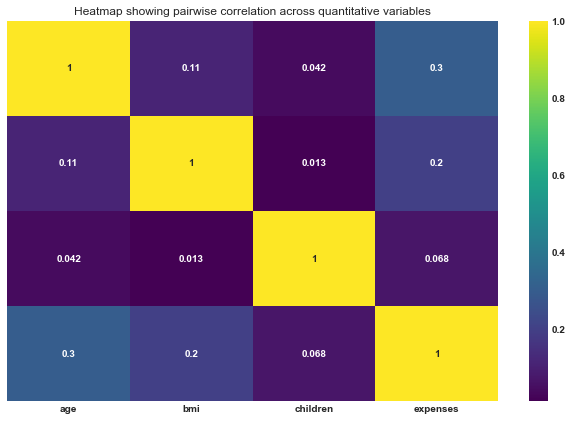

In [11]:
plt.figure(figsize = (11, 7))
sns.heatmap(health_coverage.corr(), cmap = 'viridis', yticklabels = False, annot = True)
plt.title('Heatmap showing pairwise correlation across quantitative variables')

### View data in tabular form

In [12]:
# View entire dataset
health_coverage

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [13]:
# First 10 obs
health_coverage.head(10)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [14]:
# Last 25 obs
health_coverage.tail(25)

,age,sex,bmi,children,smoker,region,expenses
1313,19,female,34.7,2,yes,southwest,36397.58
1314,30,female,23.7,3,yes,northwest,18765.88
1315,18,male,28.3,1,no,northeast,11272.33
1316,19,female,20.6,0,no,southwest,1731.68
1317,18,male,53.1,0,no,southeast,1163.46
1318,35,male,39.7,4,no,northeast,19496.72
1319,39,female,26.3,2,no,northwest,7201.70
1320,31,male,31.1,3,no,northwest,5425.02
1321,62,male,26.7,0,yes,northeast,28101.33
1322,62,male,38.8,0,no,southeast,12981.35


### Fit simple linear regression models

Text(0.5, 1.0, 'Linear model of BMI vs. age')

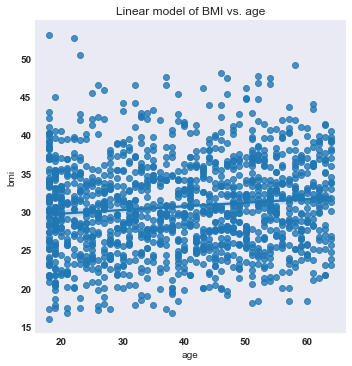

In [15]:
# BMI vs. age
sns.lmplot(x = 'age', y = 'bmi', data = health_coverage)
plt.title('Linear model of BMI vs. age')

Text(0.5, 1.0, 'Linear model of BMI vs. age')

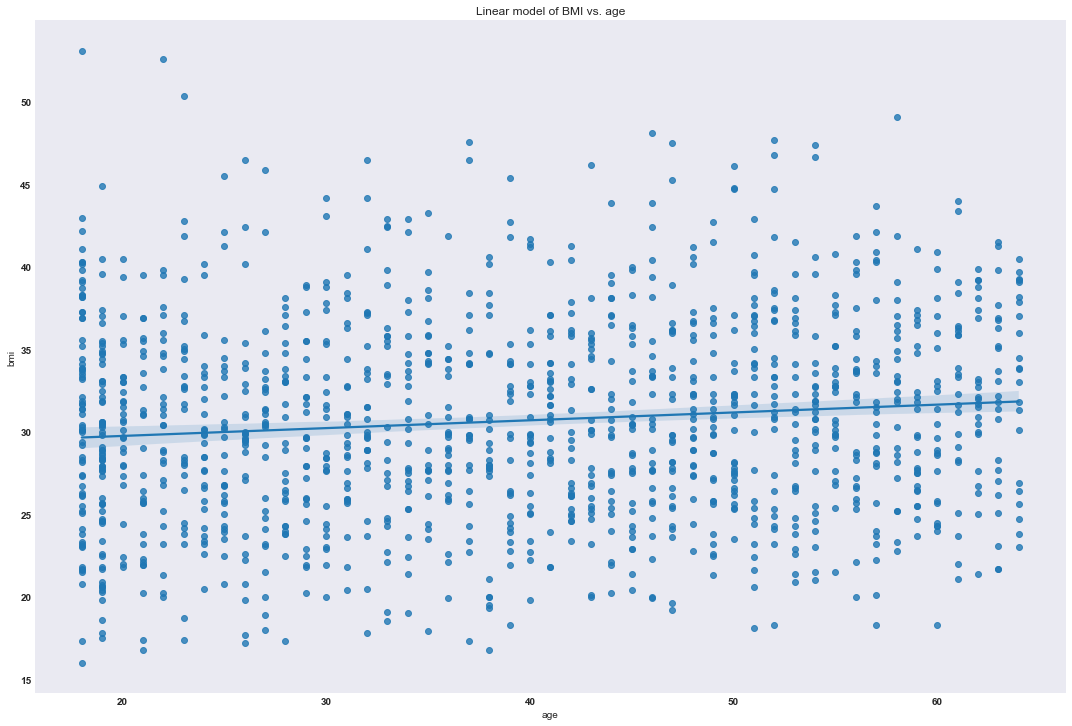

In [16]:
# Adjust the size of the plot above
sns.lmplot(x = 'age', y = 'bmi', data = health_coverage, aspect = 1.5, height = 10)
plt.title('Linear model of BMI vs. age')

Text(6.175000000000004, 0.5, 'Insurance expenses (in USD)')

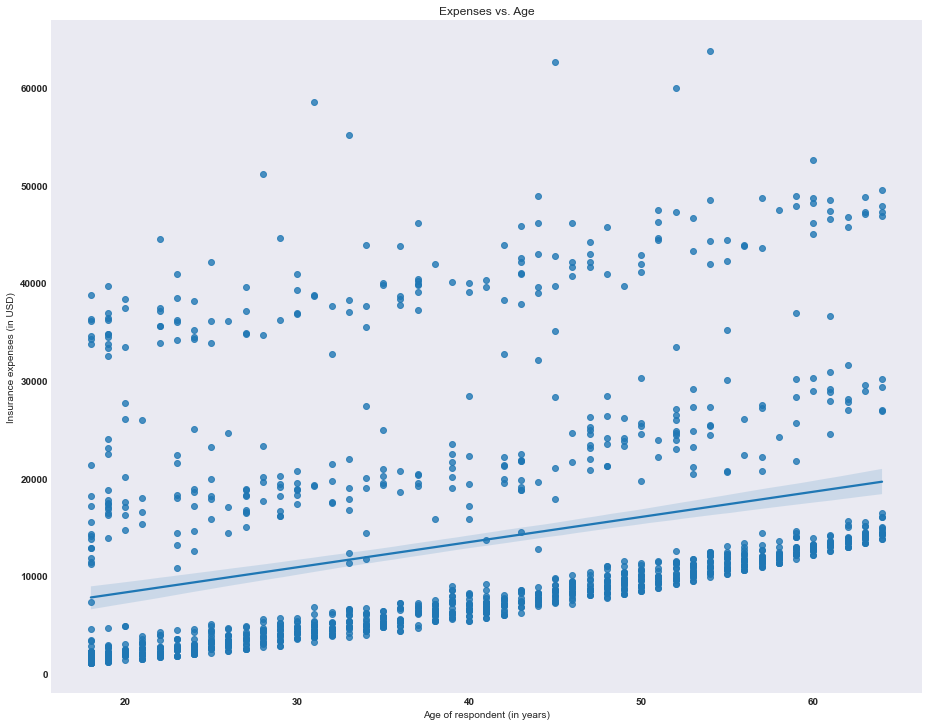

In [17]:
# Expenses vs. Age
sns.lmplot(x = 'age', y = 'expenses', data = health_coverage, aspect = 1.3, height = 10)
plt.title('Expenses vs. Age')
plt.xlabel('Age of respondent (in years)')
plt.ylabel('Insurance expenses (in USD)')

### Univariate distributions

C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Univariate distribution of Age (on a $log$ scale)')

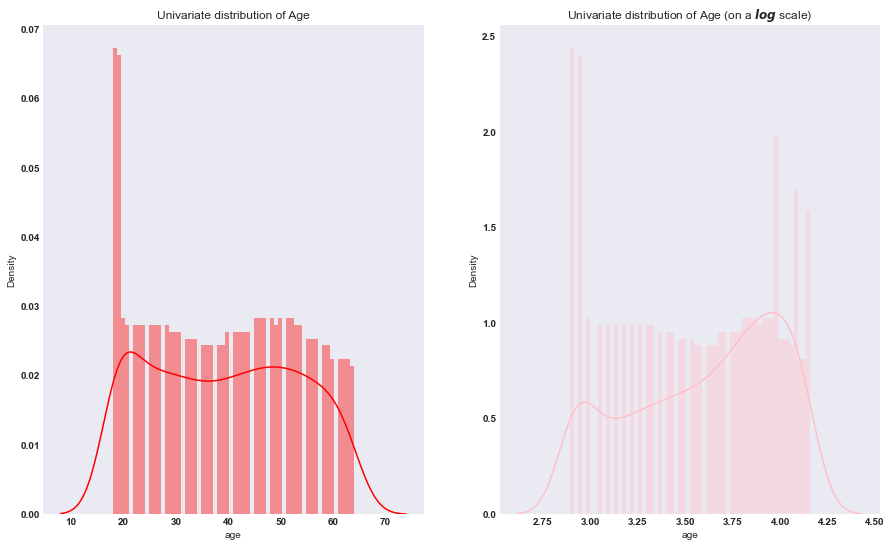

In [62]:
# Age (raw and log scale)

a = plt.figure(figsize = (15, 9))

# Age (raw)
ax1 = a.add_subplot(121)
sns.distplot(health_coverage['age'], bins = 60, color = 'red', ax = ax1)
ax1.set_title('Univariate distribution of Age')

# Age (log scale)
ax2 = a.add_subplot(122)
sns.distplot(np.log(health_coverage['age']), bins = 60, color = 'pink', ax = ax2)
ax2.set_title('Univariate distribution of Age (on a $log$ scale)')

C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Univariate distribution of BMI (on a $log$ scale)')

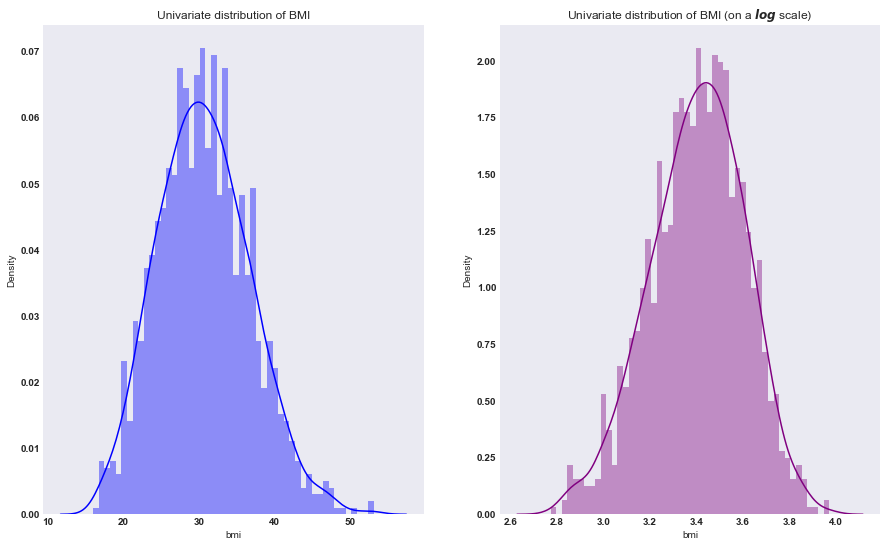

In [65]:
# BMI
b = plt.figure(figsize = (15, 9))

ax3 = b.add_subplot(121)
sns.distplot(health_coverage['bmi'], bins = 50, color = 'blue', ax = ax3)
ax3.set_title('Univariate distribution of BMI')

ax4 = b.add_subplot(122)
sns.distplot(np.log(health_coverage['bmi']), bins = 50, color = 'purple', ax = ax4)
ax4.set_title('Univariate distribution of BMI (on a $log$ scale)')


### Box plots

Text(0.5, 1.0, 'Box plot of Expenses by region')

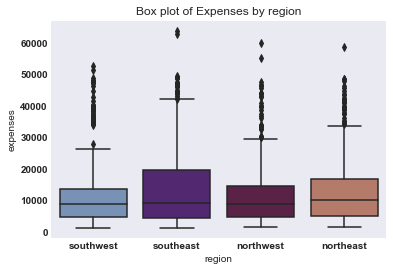

In [20]:
# Expenses by region
sns.boxplot(x = 'region', y = 'expenses', data = health_coverage, palette = 'twilight')
plt.title('Box plot of Expenses by region')

Text(0.5, 1.0, 'Box plot of Expenses by Region: \nGrouped by Smoker status')

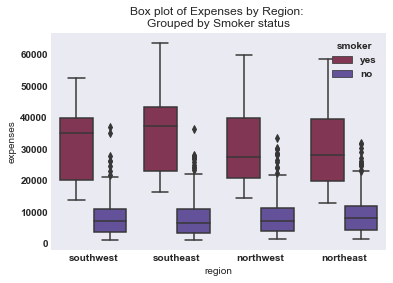

In [21]:
# Expenses by region, grouped by smoking
sns.boxplot(x = 'region', y = 'expenses', data = health_coverage, hue = 'smoker', palette = 'twilight_r')
plt.title('Box plot of Expenses by Region: \nGrouped by Smoker status')

### Violin plots

Text(0.5, 1.0, 'Violin plot of BMI by region')

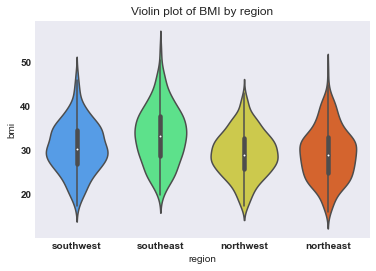

In [22]:
# BMI by region
sns.violinplot(x = 'region', y = 'bmi', data = health_coverage, palette = 'turbo')
plt.title('Violin plot of BMI by region')

Text(0.5, 1.0, 'Violin plot of BMI vs. Region: \n"Split-Grouped" by Sex')

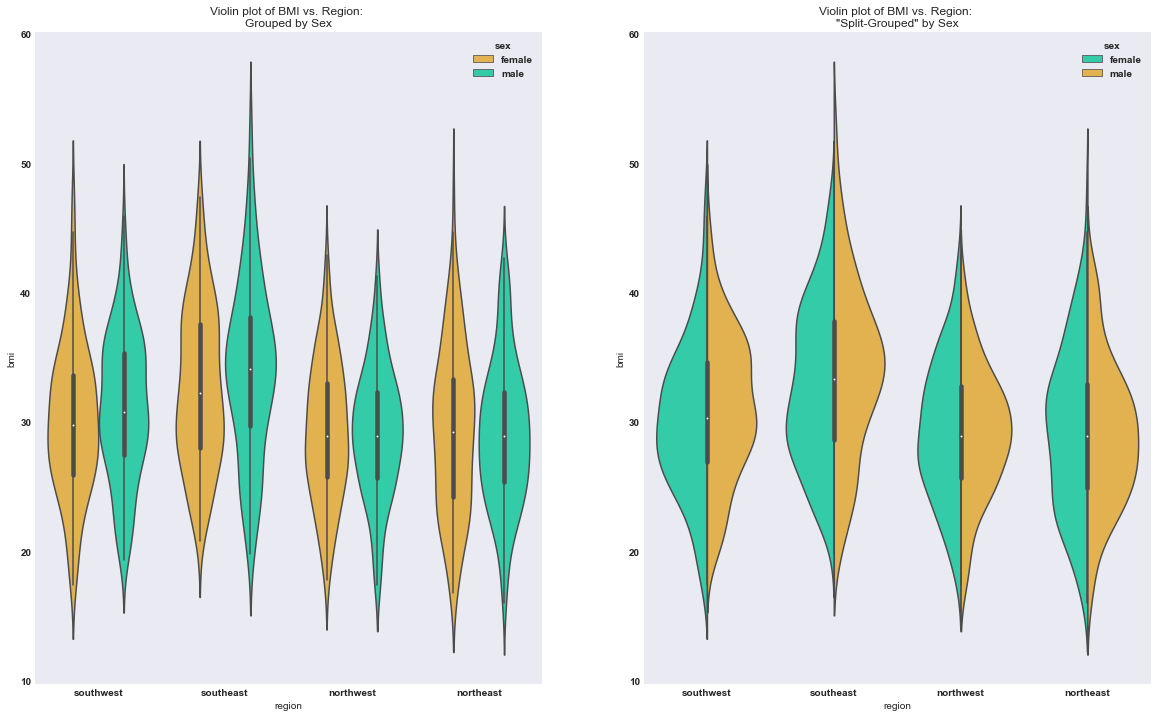

In [23]:
# BMI by region; grouped by Sex
g = plt.figure(figsize = (20, 12))

ax_a = g.add_subplot(121)
sns.violinplot(x = 'region', y = 'bmi', data = health_coverage, palette = 'turbo_r', hue = 'sex', ax = ax_a)
ax_a.set_title('Violin plot of BMI vs. Region: \nGrouped by Sex')

ax_b = g.add_subplot(122)
sns.violinplot(x = 'region', y = 'bmi', data = health_coverage, palette = 'turbo', hue = 'sex', ax = ax_b, split = True)
ax_b.set_title('Violin plot of BMI vs. Region: \n"Split-Grouped" by Sex')

### Scatter plots

Text(0.5, 1.0, 'Scatter plot of BMI vs. Age')

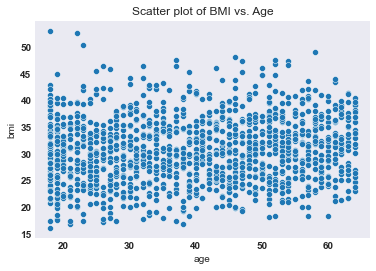

In [24]:
# BMI vs. age
sns.scatterplot(x = 'age', y = 'bmi', data = health_coverage, palette = 'rainbow')
plt.title('Scatter plot of BMI vs. Age')

Text(0.5, 1.0, 'Scatter plot of Expenses vs. Age')

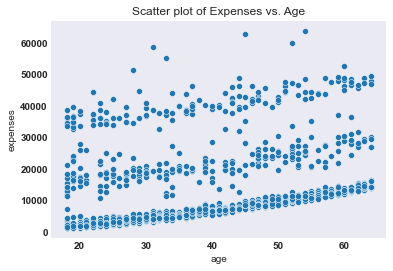

In [25]:
# Expenses vs. Age
sns.scatterplot(x = 'age', y = 'expenses', data = health_coverage, palette = 'viridis')
plt.title('Scatter plot of Expenses vs. Age')

Text(0.5, 1.0, 'Scatter plot of Expenses vs. BMI')

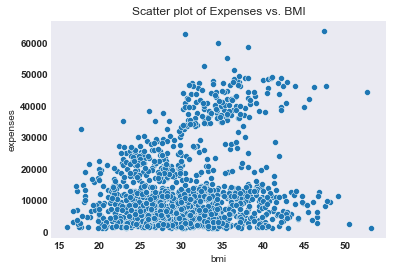

In [26]:
# Expenses vs. BMI
sns.scatterplot(x = 'bmi', y = 'expenses', data = health_coverage, palette = 'Wistia')
plt.title('Scatter plot of Expenses vs. BMI')

### Group data by specific variables

In [27]:
# Group data by Region; display the minimum, maximum, mean, and standard deviation values of BMI in each region
health_coverage.groupby('region').agg(['min', 'max', 'mean', 'std'])['bmi']

C:\Users\tohaj\AppData\Local\Temp\ipykernel_9636\1978642847.py:2: FutureWarning: ['sex', 'smoker'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  health_coverage.groupby('region').agg(['min', 'max', 'mean', 'std'])['bmi']


,min,max,mean,std
region,,,,
northeast,16.0,48.1,29.176235,5.936847
northwest,17.4,42.9,29.201846,5.136140
southeast,19.8,53.1,33.359341,6.478891
southwest,17.4,47.6,30.596615,5.691836


In [28]:
# Group data by smoker; display the minimum, maximum, mean, and standard deviation values of age in each smoker group
health_coverage.groupby('smoker').aggregate(['min', 'max', 'mean', 'std'])['age']

C:\Users\tohaj\AppData\Local\Temp\ipykernel_9636\4017635045.py:2: FutureWarning: ['sex', 'region'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  health_coverage.groupby('smoker').aggregate(['min', 'max', 'mean', 'std'])['age']


,min,max,mean,std
smoker,,,,
no,18,64,39.385338,14.083410
yes,18,64,38.514599,13.923186


## Dummy-recode categorical IVs

In [29]:
health_recode = pd.get_dummies(data = health_coverage, columns = ['sex', 'smoker', 'region', 'children'],
    prefix = 'ATM', prefix_sep = '_', dtype = 'int8', drop_first = True)

In [30]:
print('The original data contains the following variables: \n' + str(health_coverage.columns.values))
print('The original data has', health_coverage.shape[0], 'rows and', health_coverage.shape[1], 'columns.')
print('\nThe new data has the following variables:\n', health_recode.columns.values)
print('The new data has ' + str(health_recode.shape[0]) + ' rows and ' + str(health_recode.shape[1]) + ' columns.')

The original data contains the following variables: 
['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'expenses']
The original data has 1338 rows and 7 columns.

The new data has the following variables:
 ['age' 'bmi' 'expenses' 'ATM_male' 'ATM_yes' 'ATM_northwest'
 'ATM_southeast' 'ATM_southwest' 'ATM_1' 'ATM_2' 'ATM_3' 'ATM_4' 'ATM_5']
The new data has 1338 rows and 13 columns.


In [31]:
# first 15 obs in the new data
health_recode.head(15)

,age,bmi,expenses,ATM_male,ATM_yes,ATM_northwest,ATM_southeast,ATM_southwest,ATM_1,ATM_2,ATM_3,ATM_4,ATM_5
0,19,27.9,16884.92,0,1,0,0,1,0,0,0,0,0
1,18,33.8,1725.55,1,0,0,1,0,1,0,0,0,0
2,28,33.0,4449.46,1,0,0,1,0,0,0,1,0,0
3,33,22.7,21984.47,1,0,1,0,0,0,0,0,0,0
4,32,28.9,3866.86,1,0,1,0,0,0,0,0,0,0
5,31,25.7,3756.62,0,0,0,1,0,0,0,0,0,0
6,46,33.4,8240.59,0,0,0,1,0,1,0,0,0,0
7,37,27.7,7281.51,0,0,1,0,0,0,0,1,0,0
8,37,29.8,6406.41,1,0,0,0,0,0,1,0,0,0
9,60,25.8,28923.14,0,0,1,0,0,0,0,0,0,0


## Box-Cox Transformation

In [32]:
from scipy.stats import boxcox

In [33]:
# Boc-Cox-transform the DV, i.e., expenses
y_bc, ci, lam = boxcox(health_recode['expenses'], alpha = 0.05)

In [34]:
ci, lam

(0.04364902969059508, (-0.011402950284988304, 0.09880965012231949))

The CI for the lambda value does not contain 1, so a transformation is appropriate
Since the lambda value is 0, log-transformation is used. For more info visit:
https://www.statisticshowto.com/probability-and-statistics/normal-distributions/box-cox-transformation/

In [35]:
health_recode['expenses'] = np.log(health_recode['expenses'])

C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Univariate distribution of transformed expenses')

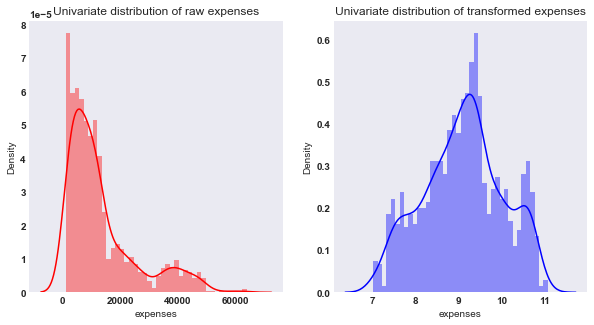

In [36]:
# Re-check the univariate distribution of the DV
a = plt.figure(figsize = (10, 5))

ax1 = a.add_subplot(121)
sns.distplot(health_coverage['expenses'], bins = 40, color = 'red', ax = ax1)
ax1.set_title('Univariate distribution of raw expenses')

ax2 = a.add_subplot(122)
sns.distplot(health_recode['expenses'], bins = 40, color = 'blue', ax = ax2)
ax2.set_title('Univariate distribution of transformed expenses')

Result: The transformed DV is not entirely normal, but it's closer and the skewness skewness is reduced.

## Train-Test Split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x = health_recode.drop('expenses', axis = 1) # The IVs, i.e., all variables except expenses
y = health_recode['expenses'] # The DV, i.e., expenses

In [39]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 23)

## Model Building
First, add a feature  𝐱0=1  to our original data set:

In [40]:
# Add x0 = 1 to IV datasets (both training and test)

x_train_0 = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0], 1)), x_test]

Next, build model using the linear regression equation  $\mathbf{\theta = (X^T X)^{-1} X^Ty}$:

In [41]:
# Build model
theta = np.matmul(np.linalg.inv(np.matmul(x_train_0.T, x_train_0)), np.matmul(x_train_0.T, y_train))

In [42]:
# Name the parameters for the linear regression
parameter = ['theta_' + str(i) for i in range(x_train_0.shape[1])]
parameter

['theta_0',
 'theta_1',
 'theta_2',
 'theta_3',
 'theta_4',
 'theta_5',
 'theta_6',
 'theta_7',
 'theta_8',
 'theta_9',
 'theta_10',
 'theta_11',
 'theta_12']

In [43]:
attributes = ['intersect: x0=1'] + list(x.columns.values)
attributes

['intersect: x0=1',
 'age',
 'bmi',
 'ATM_male',
 'ATM_yes',
 'ATM_northwest',
 'ATM_southeast',
 'ATM_southwest',
 'ATM_1',
 'ATM_2',
 'ATM_3',
 'ATM_4',
 'ATM_5']

In [44]:
# Arrange the three in a data frame
parameters_df = pd.DataFrame({'Parameter':parameter, 'Columns':attributes, 'Theta':theta})
parameters_df

,Parameter,Columns,Theta
0,theta_0,intersect: x0=1,7.059529
1,theta_1,age,0.033134
2,theta_2,bmi,0.013503
3,theta_3,ATM_male,-0.067753
4,theta_4,ATM_yes,1.550440
5,theta_5,ATM_northwest,-0.055856
6,theta_6,ATM_southeast,-0.146524
7,theta_7,ATM_southwest,-0.133458
8,theta_8,ATM_1,0.149481
9,theta_9,ATM_2,0.272959


Next, verify the theta values using Sk-learn linear regression module:

In [45]:
# Import the linear regression module:
from sklearn.linear_model import LinearRegression

In [46]:
# Fit the linear regression model to the training data:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# NB: the datasets containing the x0=1 is not used, because the sklearn module takes care of that by default.

LinearRegression()

In [47]:
# Now calculate theta values
sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
sk_theta

[7.059528567663587,
 0.033134187988675644,
 0.01350334642947497,
 -0.06775338987758335,
 1.5504395050290452,
 -0.055855932971038115,
 -0.1465239053594301,
 -0.13345835309950052,
 0.14948114376461066,
 0.27295892482326556,
 0.2440660271790237,
 0.5234197682164694,
 0.4661107835785002]

In [48]:
# For easy comparison, place the sk-learn theta values and the previosu theta values side-by-side in a data frame:
parameters_check = parameters_df.join(pd.Series(sk_theta, name = 'sk_Theta'))
parameters_check

,Parameter,Columns,Theta,sk_Theta
0,theta_0,intersect: x0=1,7.059529,7.059529
1,theta_1,age,0.033134,0.033134
2,theta_2,bmi,0.013503,0.013503
3,theta_3,ATM_male,-0.067753,-0.067753
4,theta_4,ATM_yes,1.550440,1.550440
5,theta_5,ATM_northwest,-0.055856,-0.055856
6,theta_6,ATM_southeast,-0.146524,-0.146524
7,theta_7,ATM_southwest,-0.133458,-0.133458
8,theta_8,ATM_1,0.149481,0.149481
9,theta_9,ATM_2,0.272959,0.272959


The Sk theta values match those from the normal equation.

## Model Evaluation

### Using the normal equation approach
Calculate predicted y ($\mathbf{\hat{y}}$), mean square error (MSE), and R_squared ($\mathbf{R^2}$)

Predicted y ($\mathbf{\hat{y}}$) = $\mathbf{X*\theta}$:

In [49]:
# predicted y
y_pred_norm = np.matmul(x_test_0, theta)

MSE ($\mathbf{ J(\theta)}$) = $\mathbf{\frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$:

In [50]:
# MSE
mse = np.sum((y_pred_norm - y_test)**2) / x_test_0.shape[0]

R_squared ($\mathbf{R^2}$) = $\mathbf{1 - \frac {SSE}{SST}}$

In [51]:
# sse (sum of square error) = sum((y_hat - y_i)^2)
sse = np.sum((y_pred_norm - y_test)**2)

# sst (sum of square total) = sum((y_i - y_bar)^2)
sst = np.sum((y_test - y_test.mean())**2)

R_squared = 1 - (sse/sst)

In [52]:
print('The mean square error for the normal method is', mse)
print('The R_squared for the normal method is ' + str(R_squared))

The mean square error for the normal method is 0.18728542676221976
The R_squared for the normal method is 0.7795814253322976


### Using the sklearn module approach

In [53]:
# Calculate y_hat (predicted y)
y_pred_sk = lin_reg.predict(x_test)

In [54]:
# Calculate MSE
from sklearn.metrics import mean_squared_error
mse_sk = mean_squared_error(y_pred_sk, y_test)

In [55]:
# Calculate R_squared
R_squared_sk = lin_reg.score(x_test, y_test)

In [56]:
print('The MSE from the sklearn approach is ' + str(mse_sk))
print('The R_squared from the sklearn approach is', R_squared_sk)

The MSE from the sklearn approach is 0.18728542676222046
The R_squared from the sklearn approach is 0.7795814253322967


Both approaches return an R_squared of 77.95%. So it's a good fit. Next, we validate the model by checking the underlying assumptions of linear regression.

## Model Validation
The assumptions of linear regression are tested as follows:

C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residuals vs. Predicted values')

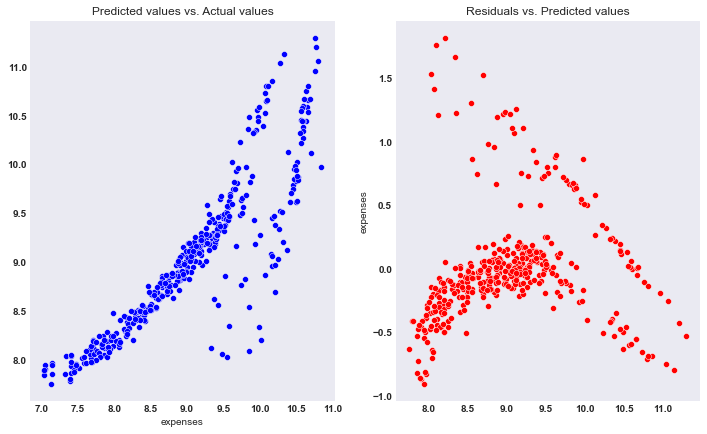

In [57]:
v = plt.figure(figsize = (12, 7))

# 1. Check for linearity: Plot a scatterplot of y_hat against y
ax5 = v.add_subplot(121)
sns.scatterplot(y_test, y_pred_sk, color = 'blue', ax = ax5)
ax5.set_title('Predicted values vs. Actual values')

# 2. Check for homoscedasticity: Plot a scatterplot of residual (y - y_hat) against y_hat
ax6 = v.add_subplot(122)
sns.scatterplot(y_pred_sk, (y_test - y_pred_sk), color = 'red', ax = ax6)
ax6.set_title('Residuals vs. Predicted values')

Verdict: The relationship is not linear. This assumption is violated.

The second plot checks for homoscedasticity. The plot is heteroscedastic (i.e, the error varies). Therefore, this assumption is also violated.

C:\Users\tohaj\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual normality and mean')

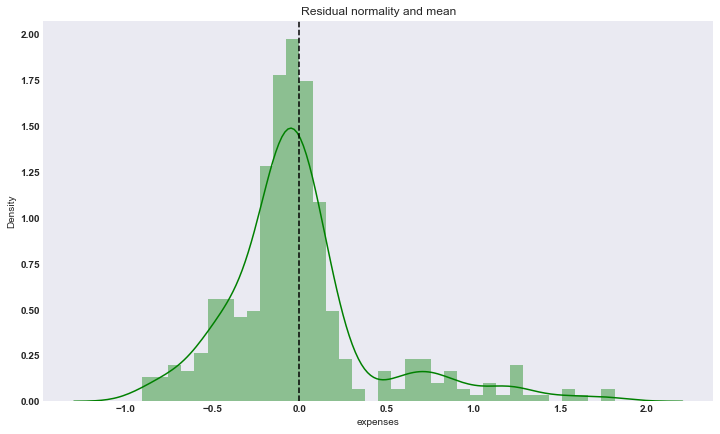

In [58]:
# 3. Check for residual's normality (should be normal) and mean (should be 0)
plt.figure(figsize = (12, 7))
sns.distplot((y_test - y_pred_sk), color = 'green')
plt.axvline((y_test - y_pred_sk).mean(), color = 'black', linestyle = '--')
plt.title('Residual normality and mean')

Verdict: The reidual plot is positively skewed, but the mean is zero. Assumption partially violated.

Text(0.5, 1.0, 'Check to multivariate normality: \nthe Q-Q plot')

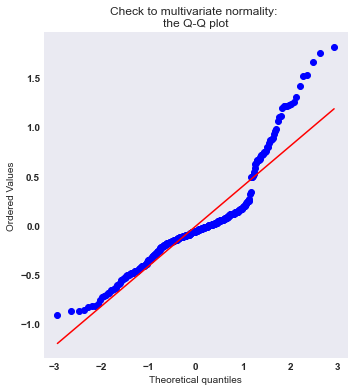

In [59]:
# 4. Check for multivariate normality: the Q-Q plot
h = plt.figure(figsize = (12, 6))

import scipy as sp
ax = h.add_subplot(121)
_,(_,_,r) = sp.stats.probplot((y_test - y_pred_sk), fit = True, plot = ax)
plt.title('Check to multivariate normality: \nthe Q-Q plot')

In [60]:
# 5. Check for multicollinearity
VIF = 1/(1 - R_squared_sk)
VIF

4.536822731512402

VIF is <5, so there is no multicollinearity in the data.